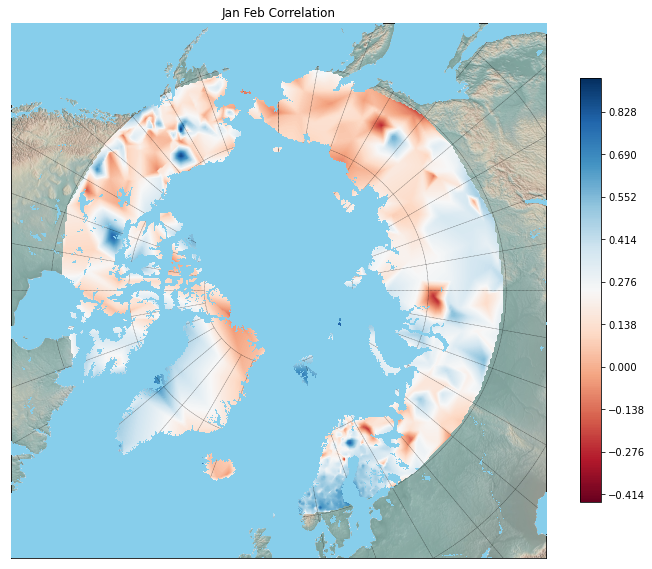

In [1]:
import numpy as np
from scipy.interpolate import griddata
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import pandas as pd
geo_df=pd.read_csv('ghcnm_out/Correlated Data/Stations 30 year data.csv')

#Define mapframe
lllon = -180
lllat = 60
urlon = 180
urlat = 90

# Make some toy data, random points + corners
n = 1831 # no of stations
lat = np.array(geo_df.iloc[:1098,15])
lat = np.append(lat, [lllat, urlat, urlat, lllat]) 
lon = np.array(geo_df.iloc[:1098,16])
lon = np.append(lon, [lllon, urlon, lllon, urlon])
data = np.array(geo_df.iloc[:1102,2])
# set up basemap chose projection!
m = Basemap(projection='npstere',boundinglat=55,lon_0=0,resolution='l')

# transform coordinates to map projection m
m_lon, m_lat = m(*(lon, lat))

# generate grid data
numcols, numrows = 240, 240
xi = np.linspace(m_lon.min(), m_lon.max(), numcols)
yi = np.linspace(m_lat.min(), m_lat.max(), numrows)
xi, yi = np.meshgrid(xi, yi)

# interpolate, there are better methods, especially if you have many datapoints
zi = griddata((m_lon,m_lat),data,(xi,yi),method='linear')

fig, ax = plt.subplots(figsize=(12, 12))

# draw map details
m.shadedrelief()
# m.drawmapboundary(fill_color = 'lightgreen', zorder = 1)

# Plot interpolated temperatures
m.contourf(xi, yi, zi, 500, cmap='RdBu', zorder = 2)

m.drawlsmask(ocean_color='skyblue', land_color=(0, 0, 0, 0), lakes=True, zorder = 3)

m.drawparallels(np.arange(-80.,81.,10.),  linewidth=0.4)
m.drawmeridians(np.arange(-180.,181.,10.),  linewidth=0.4)

plt.colorbar(shrink=0.65)
plt.title('Jan Feb Correlation')

plt.show()

In [ ]:
import numpy as np
from scipy.interpolate import griddata
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import pandas as pd
geo_df=pd.read_csv('ghcnm_out/Correlated Data/Stations 50 year data.csv')

#Define mapframe
lllon = -180
lllat = 60
urlon = 180
urlat = 90

# Make some toy data, random points + corners
n = 1831 # no of stations
lat = np.array(geo_df.iloc[:1098,15])
lat = np.append(lat, [lllat, urlat, urlat, lllat]) 
lon = np.array(geo_df.iloc[:1098,16])
lon = np.append(lon, [lllon, urlon, lllon, urlon])
data = np.array(geo_df.iloc[:1102,2])
# set up basemap chose projection!
m = Basemap(projection='npstere',boundinglat=55,lon_0=0,resolution='l')

# transform coordinates to map projection m
m_lon, m_lat = m(*(lon, lat))

# generate grid data
numcols, numrows = 240, 240
xi = np.linspace(m_lon.min(), m_lon.max(), numcols)
yi = np.linspace(m_lat.min(), m_lat.max(), numrows)
xi, yi = np.meshgrid(xi, yi)

# interpolate, there are better methods, especially if you have many datapoints
zi = griddata((m_lon,m_lat),data,(xi,yi),method='linear')

fig, ax = plt.subplots(figsize=(12, 12))

# draw map details
m.shadedrelief()
# m.drawmapboundary(fill_color = 'lightgreen', zorder = 1)

# Plot interpolated temperatures
m.contourf(xi, yi, zi, 500, cmap='RdBu', zorder = 2)

m.drawlsmask(ocean_color='skyblue', land_color=(0, 0, 0, 0), lakes=True, zorder = 3)

m.drawparallels(np.arange(-80.,81.,10.),  linewidth=0.4)
m.drawmeridians(np.arange(-180.,181.,10.),  linewidth=0.4)

plt.colorbar(shrink=0.65)
plt.title('Jan Feb Correlation')

plt.show()